<a href="https://colab.research.google.com/github/priyanka0178885547/ML-LAB/blob/main/week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/diabetes (2).csv')
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
X = df[col_names]
y = df['Outcome']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
clf=DecisionTreeClassifier( max_depth=2)
clf=clf.fit(x_train,y_train)

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.7012987012987013
Recall: 0.2804878048780488
Precision: 0.696969696969697


In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

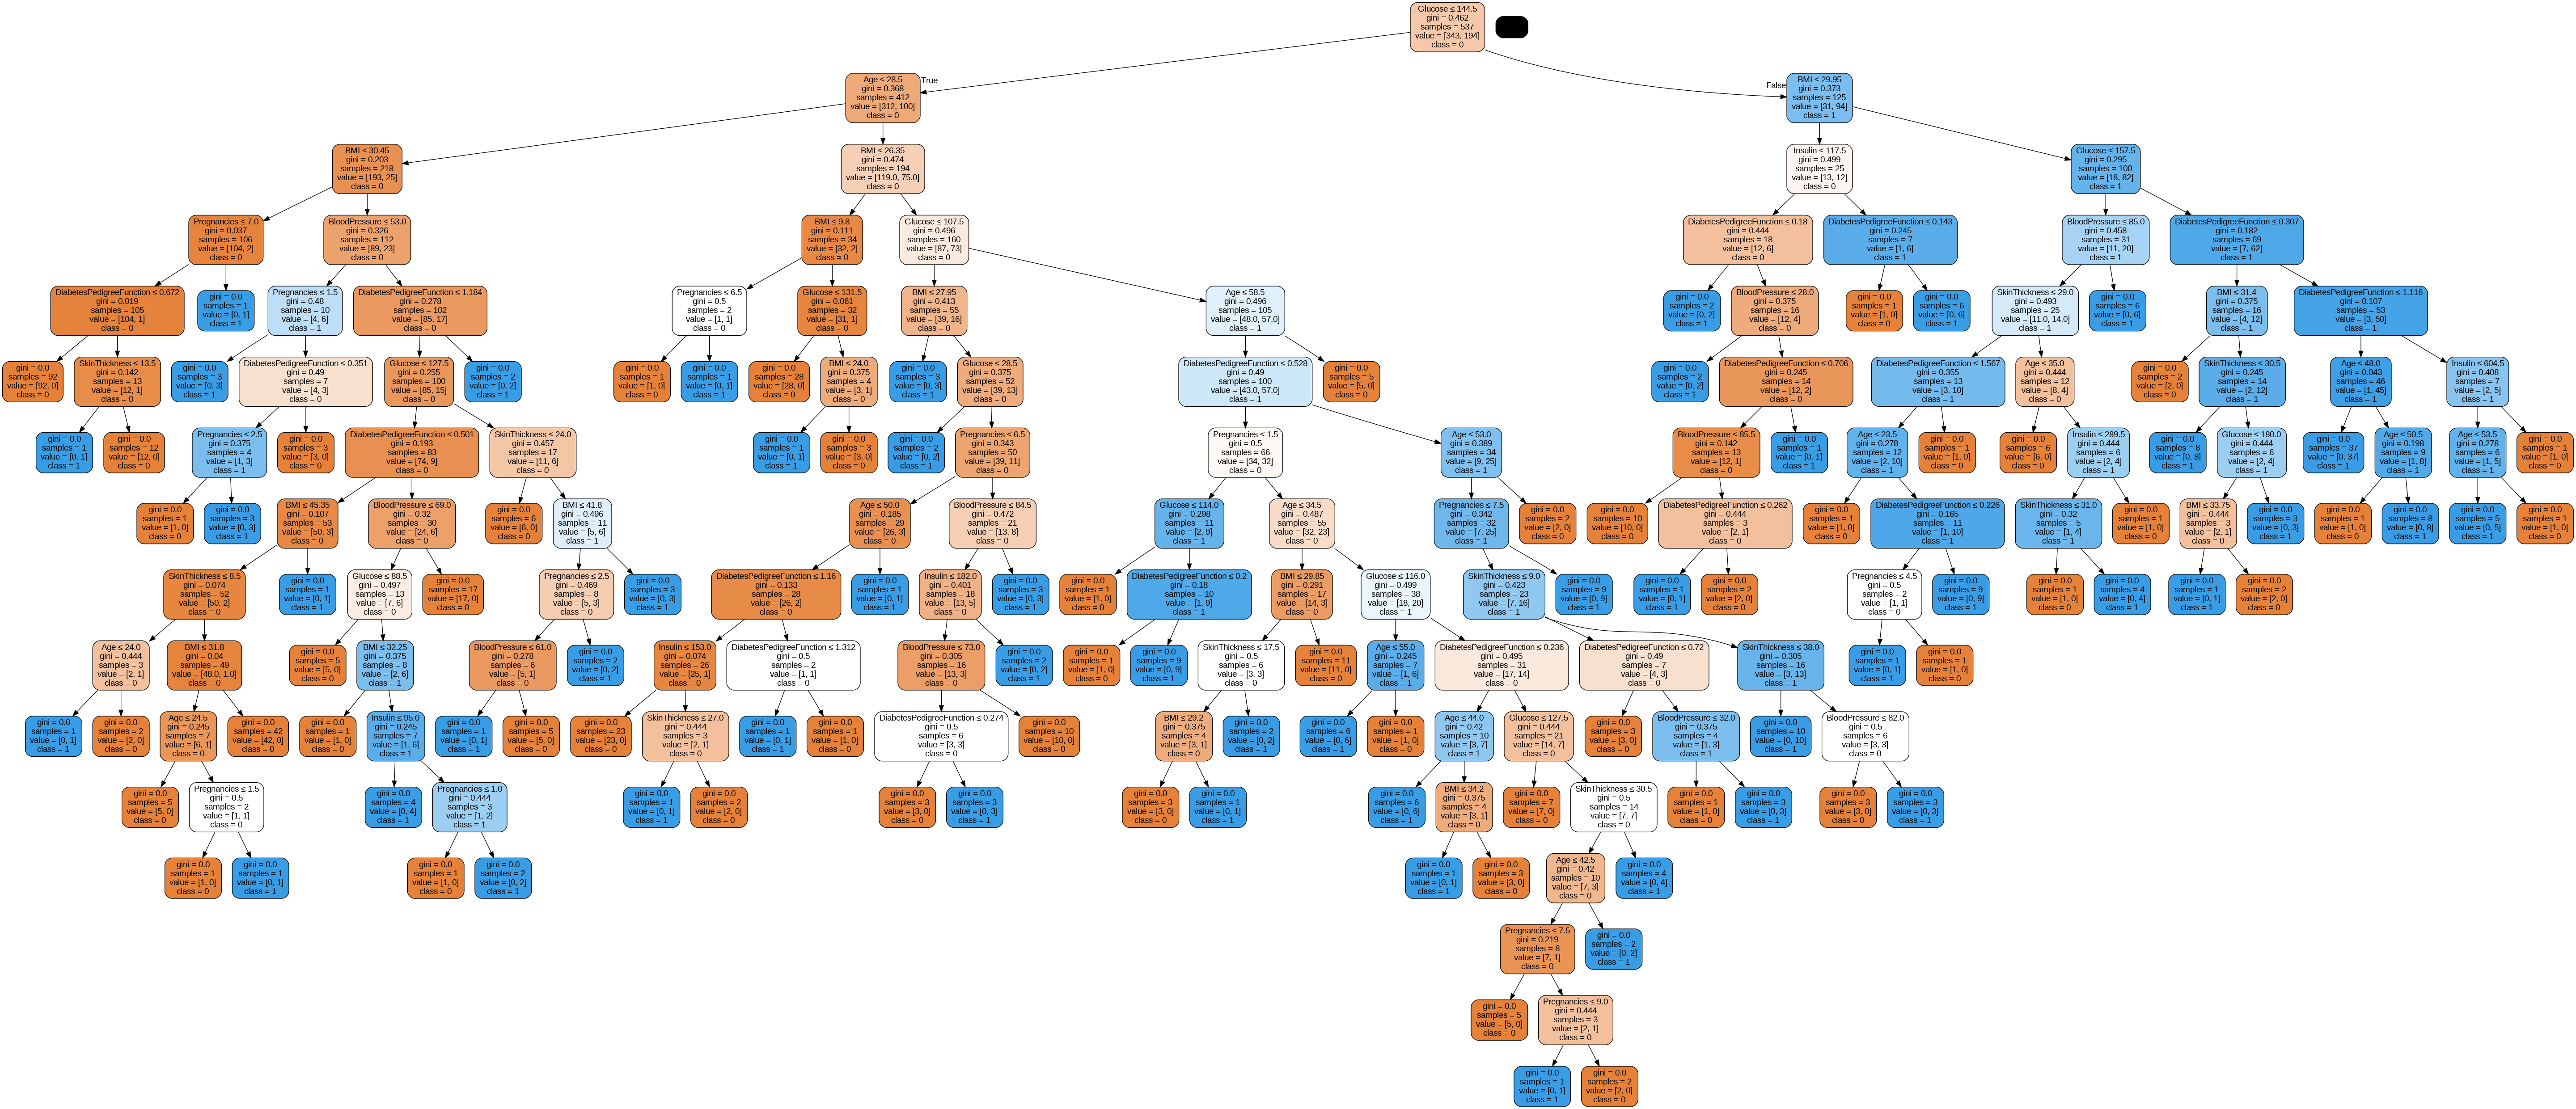

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True, special_characters=True,feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred))
print("Recall:",metrics.recall_score(y_test, rf_pred))
print("Precision:",metrics.precision_score(y_test, rf_pred))

Accuracy: 0.7878787878787878
Recall: 0.5609756097560976
Precision: 0.7796610169491526


In [ ]:
rf=RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=4,random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred))
print("Recall:",metrics.recall_score(y_test, rf_pred))
print("Precision:",metrics.precision_score(y_test, rf_pred))

Accuracy: 0.7748917748917749
Recall: 0.5
Precision: 0.7884615384615384


In [ ]:
rf=RandomForestClassifier(n_estimators=200,max_depth=None,random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred))
print("Recall:",metrics.recall_score(y_test, rf_pred))
print("Precision:",metrics.precision_score(y_test, rf_pred))

Accuracy: 0.7835497835497836
Recall: 0.573170731707317
Precision: 0.7580645161290323


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import mode

In [60]:
model1 = LogisticRegression(max_iter=1000)
model2 = DecisionTreeClassifier(random_state=42)
model3 = KNeighborsClassifier(n_neighbors=5)

In [61]:
for model in [model1, model2, model3]:
    model.fit(x_train, y_train)
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)


In [62]:
preds = np.array([pred1, pred2, pred3])
max_vote_preds, _ = mode(preds, axis=0)
max_vote_preds = max_vote_preds.flatten()

In [64]:
prob1 = model1.predict_proba(x_test)
prob2 = model2.predict_proba(x_test)
prob3 = model3.predict_proba(x_test)

In [65]:
avg_probs = (prob1 + prob2 + prob3) / 3
avg_vote_preds = np.argmax(avg_probs, axis=1)

In [67]:
acc1 = model1.score(x_train, y_train)
acc2 = model2.score(x_train, y_train)
acc3 = model3.score(x_train, y_train)

In [68]:
weights = np.array([acc1, acc2, acc3])
weighted_probs = (prob1 * weights[0] + prob2 * weights[1] + prob3 * weights[2]) / np.sum(weights)
weighted_vote_preds = np.argmax(weighted_probs, axis=1)

In [70]:
print("\nBase Model Accuracies:")
print("Logistic Regression:", accuracy_score(y_test, pred1))
print("Decision Tree:", accuracy_score(y_test, pred2))
print("KNN:", accuracy_score(y_test, pred3))



Base Model Accuracies:
Logistic Regression: 0.7532467532467533
Decision Tree: 0.961038961038961
KNN: 0.7489177489177489


In [71]:
print("\nEnsemble Accuracies:")
print("Max Voting:", accuracy_score(y_test, max_vote_preds))
print("Average Voting:", accuracy_score(y_test, avg_vote_preds))
print("Weighted Voting:", accuracy_score(y_test, weighted_vote_preds))


Ensemble Accuracies:
Max Voting: 0.8095238095238095
Average Voting: 0.8917748917748918
Weighted Voting: 0.9134199134199135


In [72]:
print("\nClassification Report (Weighted Voting):")
print(classification_report(y_test, weighted_vote_preds))


Classification Report (Weighted Voting):
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       149
           1       0.94      0.80      0.87        82

    accuracy                           0.91       231
   macro avg       0.92      0.89      0.90       231
weighted avg       0.92      0.91      0.91       231



In [73]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report


In [76]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


In [77]:
log_clf = LogisticRegression(max_iter=1000)
tree_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [79]:
hard_voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', tree_clf), ('knn', knn_clf)],
    voting='hard')


In [80]:
soft_voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', tree_clf), ('knn', knn_clf)],
    voting='soft'
)

In [81]:
hard_voting_clf.fit(x_train, y_train)
soft_voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [82]:
y_pred_hard = hard_voting_clf.predict(x_test)
y_pred_soft = soft_voting_clf.predict(x_test)

print("Hard Voting Accuracy:", accuracy_score(y_test, y_pred_hard))
print("Soft Voting Accuracy:", accuracy_score(y_test, y_pred_soft))

print("\nClassification Report (Soft Voting):")
print(classification_report(y_test, y_pred_soft))

Hard Voting Accuracy: 0.8095238095238095
Soft Voting Accuracy: 0.8917748917748918

Classification Report (Soft Voting):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       149
           1       0.91      0.77      0.83        82

    accuracy                           0.89       231
   macro avg       0.90      0.86      0.88       231
weighted avg       0.89      0.89      0.89       231

